In [188]:

from typing import Dict

def get_groups(label:str) -> Dict[str, Dict[str, str]]:
    return {
        "CNN_only_relative_xy": {
            "mean": f"Group: CNN_only_relative_xy - {label}",
            "min":  f"Group: CNN_only_relative_xy - {label}__MIN",
            "max":  f"Group: CNN_only_relative_xy - {label}__MAX",
            "scale" : 32 
        },
        "CNN_extra_features_no_leak_xy_free": {
            "mean": f"Group: CNN_extra_features_no_leak_xy_free - {label}",
            "min":  f"Group: CNN_extra_features_no_leak_xy_free - {label}__MIN",
            "max":  f"Group: CNN_extra_features_no_leak_xy_free - {label}__MAX",
            "scale" : 32 
        },
        "CNN_extra_features_no_leaking": {
            "mean": f"Group: CNN_extra_features_no_leaking - {label}",
            "min":  f"Group: CNN_extra_features_no_leaking - {label}__MIN",
            "max":  f"Group: CNN_extra_features_no_leaking - {label}__MAX",
            "scale" : 32 
        },
        "CNN_exponential": {
            "mean": f"Group: CNN_exponential - {label}",
            "min":  f"Group: CNN_exponential - {label}__MIN",
            "max":  f"Group: CNN_exponential - {label}__MAX",
            "scale" : 32 
        },
    }
EPOCH_COL = "epoch"

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import os

save_dir = "output_files"
CURRENT_DIR = os.getcwd()

def coerce_numeric(df: pd.DataFrame) -> pd.DataFrame:
    """Coerce all columns to numeric where possible (epoch included)."""
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df


def plot_group(df: pd.DataFrame, name: str, cols: Dict[str, str], label:str, save:bool = False):
    """Plot one model with mean line and min–max band."""
    needed = [EPOCH_COL, cols["mean"], cols["min"], cols["max"]]
    sub = df.loc[:, needed].dropna()
    if sub.empty:
        print(f"[WARN] No valid rows for group '{name}' — skipping.")
        return ""

    x = sub[EPOCH_COL].astype(float).values
    y = sub[cols["mean"]].astype(float).values
    y_min = sub[cols["min"]].astype(float).values
    y_max = sub[cols["max"]].astype(float).values

    plt.figure()
    plt.plot(x, y, label=label)
    plt.fill_between(x, y_min, y_max, alpha=0.2, label="min–max")
    plt.title(f"{name} — Validation MSE vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel(f"{label} in meters")
    plt.legend()
    plt.tight_layout()

    if save:
        plt.savefig(f'{CURRENT_DIR}/{name}_{label}.png', bbox_inches='tight')

    plt.show()

def plot_combined(df: pd.DataFrame, label:str, save:bool = False):
    """Plot all groups' mean val_mse on one figure."""
    plt.figure()
    any_plotted = False
    groups = get_groups(label)
    for name, cols in groups.items():
        needed = [EPOCH_COL, cols["mean"]]
        sub = df.loc[:, needed].dropna()
        if sub.empty:
            print(f"[WARN] No valid rows for group '{name}' in combined plot — skipping.")
            continue
        x = sub[EPOCH_COL].astype(float).values
        y = sub[cols["mean"]].astype(float).values
        plt.plot(x, y, label=name)
        any_plotted = True

    if not any_plotted:
        print("[WARN] No groups had valid data for combined plot.")
        return ""

    plt.title(f"Model Comparison — Validation {label}] (mean)")
    plt.xlabel("Epoch")
    plt.ylabel(f"{label} in meters")
    plt.legend()
    plt.tight_layout()

    if save:

        plt.savefig(f'{CURRENT_DIR}/all_values_{label}.png', bbox_inches='tight')

    plt.show()

In [190]:
import pandas as pd
mse_path = "/home/sbenites/Documents/WirelessLocation/validation/wandb_graphs/validation_mae_mse/wandb_mse.csv"

# MSE GRAPHS
mse_df = pd.read_csv(mse_path)
mse_groups = get_groups("val_mse")

import pandas as pd
mae_path = "/home/sbenites/Documents/WirelessLocation/validation/wandb_graphs/validation_mae_mse/wandb_mae.csv"

# MSE GRAPHS
mae_df = pd.read_csv(mae_path)
mae_groups = get_groups("val_mae")

In [191]:
for name, cols in mae_groups.items():
    mae_df[[cols["mean"], cols["min"], cols["max"]]] *= mae_groups[name]["scale"]

for name, cols in mse_groups.items():
    mse_df[[cols["mean"], cols["min"], cols["max"]]] *= mse_groups[name]["scale"]

MSE Graphs


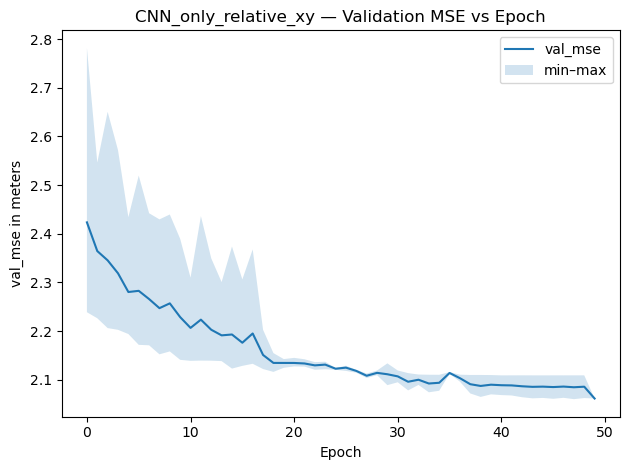

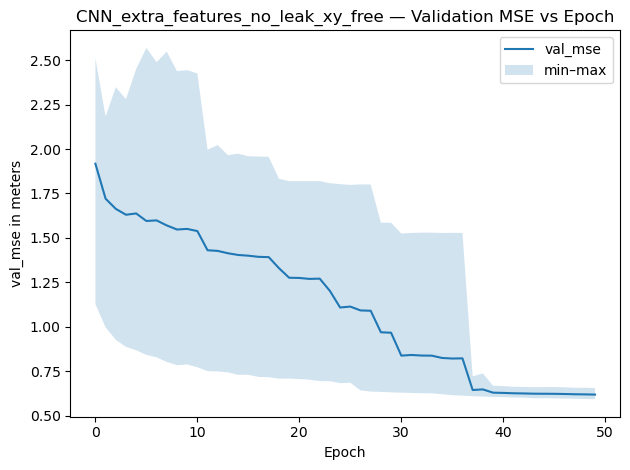

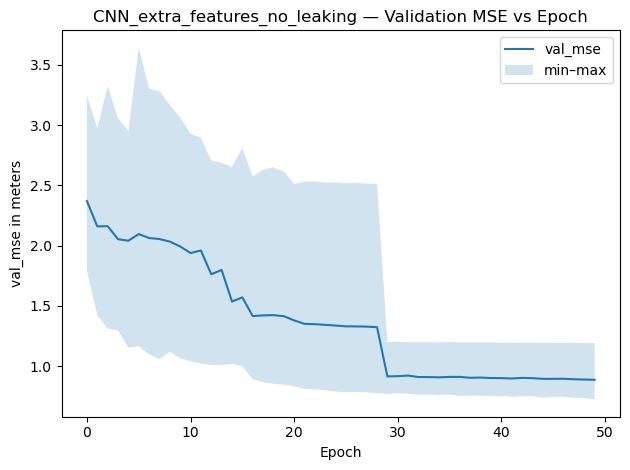

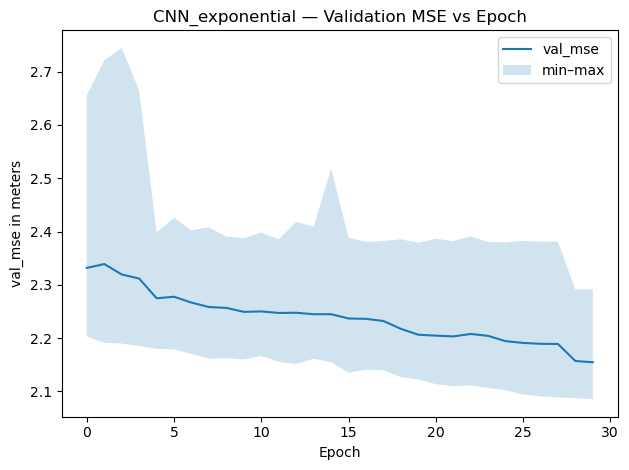

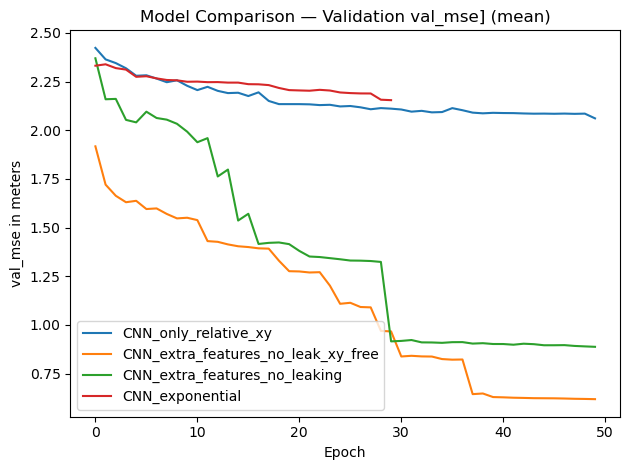

In [192]:


print("MSE Graphs")
groups = get_groups("val_mse")  # {name: {"mean":..., "min":..., "max":...}}

for name, cols in groups.items():
    plot_group(mse_df,name,cols,"val_mse", True)

# --- Combined comparison (unchanged, but optional) ---
combined = plot_combined(mse_df, "val_mse", True)

MAE Graphs


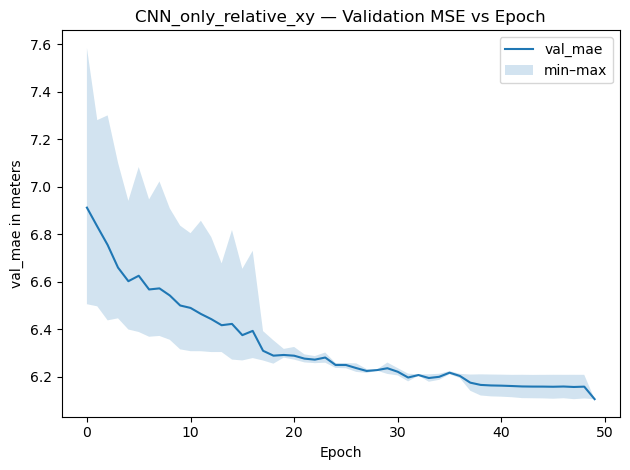

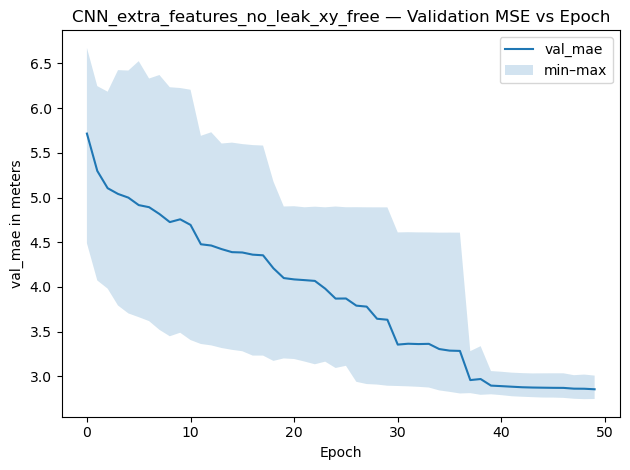

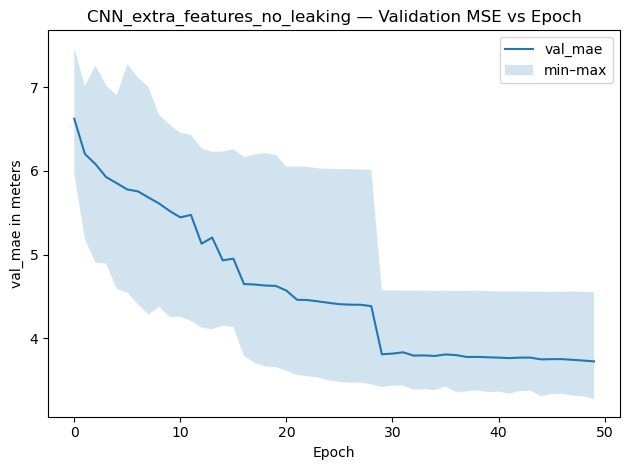

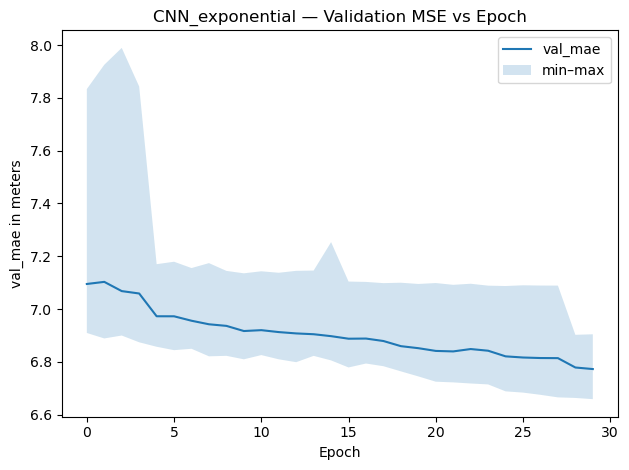

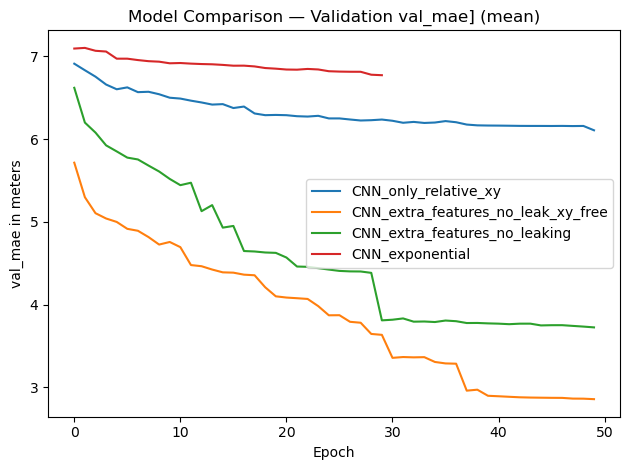

In [193]:


print("MAE Graphs")
groups = get_groups("val_mae")  # {name: {"mean":..., "min":..., "max":...}}

for name, cols in groups.items():
    plot_group(mae_df,name,cols,"val_mae", True)

# --- Combined comparison (unchanged, but optional) ---
combined = plot_combined(mae_df, "val_mae", True)